In [3]:
# https://github.com/sh2439/Reinforcement-Learning-Pytorch/blob/master/Lunar-Lander/LunarLander-Pytorch.ipynb

# Basic packages
import os

import shutil

from collections import deque

from copy import deepcopy

from tqdm.auto import tqdm

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Lunar lander and RL-GLUE packages
# from rl_glue import RLGlue
# from environment import BaseEnvironment

# from lunar_lander import LunarLanderEnvironment

# from agent import BaseAgent

# from plot_script import plot_result, draw_neural_net

# Pytorch packages
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

# Gym packages
import gym
from gym import wrappers
from time import time

In [4]:
# def draw_neural_net(ax, left, right, bottom, top, layer_sizes, coefs_, intercepts_, n_iter_, loss_):
#     '''
#     Draw a neural network cartoon using matplotilb.
    
#     :usage:
#         >>> fig = plt.figure(figsize=(12, 12))
#         >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
#     :parameters:
#         - ax : matplotlib.axes.AxesSubplot
#             The axes on which to plot the cartoon (get e.g. by plt.gca())
#         - left : float
#             The center of the leftmost node(s) will be placed here
#         - right : float
#             The center of the rightmost node(s) will be placed here
#         - bottom : float
#             The center of the bottommost node(s) will be placed here
#         - top : float
#             The center of the topmost node(s) will be placed here
#         - layer_sizes : list of int
#             List of layer sizes, including input and output dimensionality
#     '''
#     n_layers = len(layer_sizes)
#     v_spacing = (top - bottom)/float(max(layer_sizes))
#     h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
#     # Input-Arrows
#     layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
#     for m in xrange(layer_sizes[0]):
#         plt.arrow(left-0.18, layer_top_0 - m*v_spacing, 0.12, 0,  lw =1, head_width=0.01, head_length=0.02)
    
#     # Nodes
#     for n, layer_size in enumerate(layer_sizes):
#         layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
#         for m in xrange(layer_size):
#             circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/8.,
#                                 color='w', ec='k', zorder=4)
#             if n == 0:
#                 plt.text(left-0.125, layer_top - m*v_spacing, r'$X_{'+str(m+1)+'}$', fontsize=15)
#             elif (n_layers == 3) & (n == 1):
#                 plt.text(n*h_spacing + left+0.00, layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing), r'$H_{'+str(m+1)+'}$', fontsize=15)
#             elif n == n_layers -1:
#                 plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing, r'$y_{'+str(m+1)+'}$', fontsize=15)
#             ax.add_artist(circle)
#     # Bias-Nodes
#     for n, layer_size in enumerate(layer_sizes):
#         if n < n_layers -1:
#             x_bias = (n+0.5)*h_spacing + left
#             y_bias = top + 0.005
#             circle = plt.Circle((x_bias, y_bias), v_spacing/8., color='w', ec='k', zorder=4)
#             plt.text(x_bias-(v_spacing/8.+0.10*v_spacing+0.01), y_bias, r'$1$', fontsize=15)
#             ax.add_artist(circle)   
#     # Edges
#     # Edges between nodes
#     for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
#         layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
#         layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
#         for m in xrange(layer_size_a):
#             for o in xrange(layer_size_b):
#                 line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
#                                   [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
#                 ax.add_artist(line)
#                 xm = (n*h_spacing + left)
#                 xo = ((n + 1)*h_spacing + left)
#                 ym = (layer_top_a - m*v_spacing)
#                 yo = (layer_top_b - o*v_spacing)
#                 rot_mo_rad = np.arctan((yo-ym)/(xo-xm))
#                 rot_mo_deg = rot_mo_rad*180./np.pi
#                 xm1 = xm + (v_spacing/8.+0.05)*np.cos(rot_mo_rad)
#                 if n == 0:
#                     if yo > ym:
#                         ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
#                     else:
#                         ym1 = ym + (v_spacing/8.+0.05)*np.sin(rot_mo_rad)
#                 else:
#                     if yo > ym:
#                         ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
#                     else:
#                         ym1 = ym + (v_spacing/8.+0.04)*np.sin(rot_mo_rad)
#                 plt.text( xm1, ym1,\
#                          str(round(coefs_[n][m, o],4)),\
#                          rotation = rot_mo_deg, \
#                          fontsize = 10)
#     # Edges between bias and nodes
#     for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
#         if n < n_layers-1:
#             layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
#             layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
#         x_bias = (n+0.5)*h_spacing + left
#         y_bias = top + 0.005 
#         for o in xrange(layer_size_b):
#             line = plt.Line2D([x_bias, (n + 1)*h_spacing + left],
#                           [y_bias, layer_top_b - o*v_spacing], c='k')
#             ax.add_artist(line)
#             xo = ((n + 1)*h_spacing + left)
#             yo = (layer_top_b - o*v_spacing)
#             rot_bo_rad = np.arctan((yo-y_bias)/(xo-x_bias))
#             rot_bo_deg = rot_bo_rad*180./np.pi
#             xo2 = xo - (v_spacing/8.+0.01)*np.cos(rot_bo_rad)
#             yo2 = yo - (v_spacing/8.+0.01)*np.sin(rot_bo_rad)
#             xo1 = xo2 -0.05 *np.cos(rot_bo_rad)
#             yo1 = yo2 -0.05 *np.sin(rot_bo_rad)
#             plt.text( xo1, yo1,\
#                  str(round(intercepts_[n][o],4)),\
#                  rotation = rot_bo_deg, \
#                  fontsize = 10)    
                
#     # Output-Arrows
#     layer_top_0 = v_spacing*(layer_sizes[-1] - 1)/2. + (top + bottom)/2.
#     for m in xrange(layer_sizes[-1]):
#         plt.arrow(right+0.015, layer_top_0 - m*v_spacing, 0.16*h_spacing, 0,  lw =1, head_width=0.01, head_length=0.02)
#     # Record the n_iter_ and loss
#     plt.text(left + (right-left)/3., bottom - 0.005*v_spacing, \
#              'Steps:'+str(n_iter_)+'    Loss: ' + str(round(loss_, 6)), fontsize = 15)

In [5]:
# class RLGlue:
#     """RLGlue class
#     args:
#         env_name (string): the name of the module where the Environment class can be found
#         agent_name (string): the name of the module where the Agent class can be found
#     """

#     def __init__(self, env_class, agent_class):
#         self.environment = env_class()
#         self.agent = agent_class()

#         self.total_reward = None
#         self.last_action = None
#         self.num_steps = None
#         self.num_episodes = None

#     def rl_init(self, agent_init_info={}, env_init_info={}):
#         """Initial method called when RLGlue experiment is created"""
#         self.environment.env_init(env_init_info)
#         self.agent.agent_init(agent_init_info)

#         self.total_reward = 0.0
#         self.num_steps = 0
#         self.num_episodes = 0

#     def rl_start(self, agent_start_info={}, env_start_info={}):
#         """Starts RLGlue experiment
#         Returns:
#             tuple: (state, action)
#         """

#         last_state = self.environment.env_start()
#         self.last_action = self.agent.agent_start(last_state)

#         observation = (last_state, self.last_action)

#         return observation

#     def rl_agent_start(self, observation):
#         """Starts the agent.
#         Args:
#             observation: The first observation from the environment
#         Returns:
#             The action taken by the agent.
#         """
#         return self.agent.agent_start(observation)

#     def rl_agent_step(self, reward, observation):
#         """Step taken by the agent
#         Args:
#             reward (float): the last reward the agent received for taking the
#                 last action.
#             observation : the state observation the agent receives from the
#                 environment.
#         Returns:
#             The action taken by the agent.
#         """
#         return self.agent.agent_step(reward, observation)

#     def rl_agent_end(self, reward):
#         """Run when the agent terminates
#         Args:
#             reward (float): the reward the agent received when terminating
#         """
#         self.agent.agent_end(reward)

#     def rl_env_start(self):
#         """Starts RL-Glue environment.
#         Returns:
#             (float, state, Boolean): reward, state observation, boolean
#                 indicating termination
#         """
#         self.total_reward = 0.0
#         self.num_steps = 1

#         this_observation = self.environment.env_start()

#         return this_observation

#     def rl_env_step(self, action):
#         """Step taken by the environment based on action from agent
#         Args:
#             action: Action taken by agent.
#         Returns:
#             (float, state, Boolean): reward, state observation, boolean
#                 indicating termination.
#         """
#         ro = self.environment.env_step(action)
#         (this_reward, _, terminal) = ro

#         self.total_reward += this_reward

#         if terminal:
#             self.num_episodes += 1
#         else:
#             self.num_steps += 1

#         return ro

#     def rl_step(self):
#         """Step taken by RLGlue, takes environment step and either step or
#             end by agent.
#         Returns:
#             (float, state, action, Boolean): reward, last state observation,
#                 last action, boolean indicating termination
#         """

#         (reward, last_state, term) = self.environment.env_step(self.last_action)

#         self.total_reward += reward

#         if term:
#             self.num_episodes += 1
#             self.agent.agent_end(reward)
#             roat = (reward, last_state, None, term)
#         else:
#             self.num_steps += 1
#             self.last_action = self.agent.agent_step(reward, last_state)
#             roat = (reward, last_state, self.last_action, term)

#         return roat

#     def rl_cleanup(self):
#         """Cleanup done at end of experiment."""
#         self.environment.env_cleanup()
#         self.agent.agent_cleanup()

#     def rl_agent_message(self, message):
#         """Message passed to communicate with agent during experiment
#         Args:
#             message: the message (or question) to send to the agent
#         Returns:
#             The message back (or answer) from the agent
#         """

#         return self.agent.agent_message(message)

#     def rl_env_message(self, message):
#         """Message passed to communicate with environment during experiment
#         Args:
#             message: the message (or question) to send to the environment
#         Returns:
#             The message back (or answer) from the environment
#         """
#         return self.environment.env_message(message)

#     def rl_episode(self, max_steps_this_episode):
#         """Runs an RLGlue episode
#         Args:
#             max_steps_this_episode (Int): the maximum steps for the experiment to run in an episode
#         Returns:
#             Boolean: if the episode should terminate
#         """
#         is_terminal = False

#         self.rl_start()

#         while (not is_terminal) and ((max_steps_this_episode == 0) or
#                                      (self.num_steps < max_steps_this_episode)):
#             rl_step_result = self.rl_step()
#             is_terminal = rl_step_result[3]

#         return is_terminal

#     def rl_return(self):
#         """The total reward
#         Returns:
#             float: the total reward
#         """
#         return self.total_reward

#     def rl_num_steps(self):
#         """The total number of steps taken
#         Returns:
#             Int: the total number of steps taken
#         """
#         return self.num_steps

#     def rl_num_episodes(self):
#         """The number of episodes
#         Returns
#             Int: the total number of episodes
#         """
#         return self.num_episodes

In [6]:
class RLModel(nn.Module):
    
    def __init__(self, network_arch):
        
        super().__init__()
        self.num_states = network_arch['num_states']
        self.hidden_units = network_arch['num_hidden_units']
        self.num_actions = network_arch['num_actions']
        
        # The hidden layer
        self.fc1 = nn.Linear(in_features = self.num_states, out_features = self.hidden_units)
        
        # The output layer
        self.fc2 = nn.Linear(in_features = self.hidden_units, out_features = self.num_actions)
        
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        
        # No activation func, output should be a tensor(batch, num_actions)
        out = self.fc2(x)
        
        return out

In [7]:
network_arch = {
    'num_states' : 8,
    'num_hidden_units': 20,
    'num_actions':3
    
}

model = RLModel(network_arch)

model

RLModel(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=3, bias=True)
)

NameError: name 'draw_neural_net' is not defined

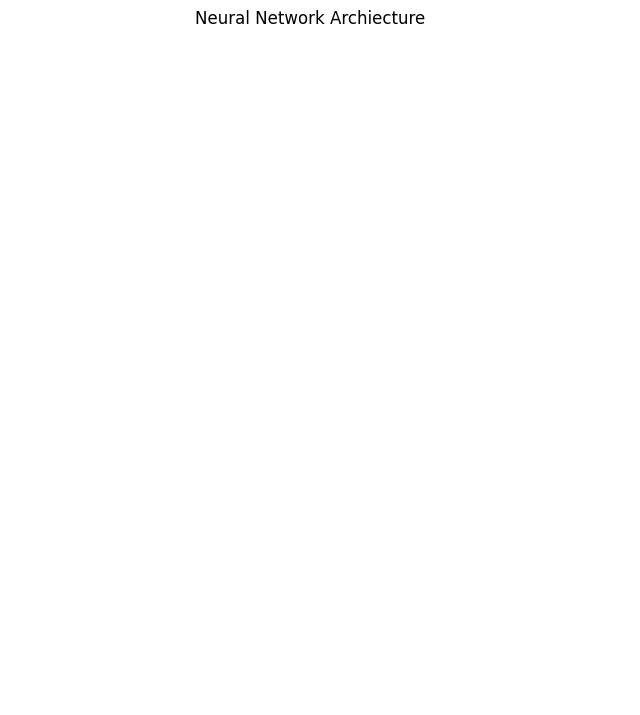

In [8]:

fig = plt.figure(figsize = (8,8))
fig.suptitle('Neural Network Archiecture')
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [8, 20, 4])

In [ ]:

# Set the learning rate
learning_rate = 0.001

# We will instantiate the optimizer in the agent class.
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, betas = [0.99, 0.999], eps = 1e-04)

In [ ]:
criterion = nn.MSELoss()

In [ ]:
class Buffer:
    
    def __init__(self, batch_size, buffer_size, seed):
        
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.rand_generator = np.random.RandomState(seed)
        
        self.buffer = []
        
        
    def append(self, state, action, terminal, reward, next_state):
        """
        Append the next experience.
        
        Args:
            state: the state (torch tensor).
            action: the action (integer).
            terminal: 1 if the next state is the terminal, 0 otherwise.
        
        """
        # delete the first experience if the size is reaching the maximum
        if len(self.buffer) == self.buffer_size:
            del self.buffer[0]
            
        self.buffer.append((torch.tensor(state), torch.tensor(action), torch.tensor(terminal), torch.tensor(reward).float(), torch.tensor(next_state)))
        
    def sample(self):
        """
        Sample from the buffer and return the virtual experience.
        
        Args:
            None
        Returns:
            A list of transition tuples (state, action, terminal, reward, next_state), list length: batch_size
        """
        
        indexs = self.rand_generator.choice(len(self.buffer), size = self.batch_size)
        
        transitions = [self.buffer[idx] for idx in indexs]
        
        return transitions
       
    def get_buffer(self):
        """
        Return the current buffer
        """
        return self.buffer
        
        

In [ ]:
def softmax(action_values, tau = 1.0):
    
    """
    Args:
        action_values: A torch tensor (2d) of size (batch_size, num_actions).
        tau: Tempearture parameter.
    
    Returns:
        probs: A torch tensor of size (batch_size, num_actions). The value represents the probability of select 
        that action.
    """
    
    max_action_value = torch.max(action_values, axis = 1, keepdim = True)[0]/tau
    action_values = action_values/tau
    
    preference = action_values - max_action_value
    
    exp_action = torch.exp(preference)
    sum_exp_action = torch.sum(exp_action, axis = 1).view(-1,1)


    probs = exp_action/sum_exp_action

    
    return probs

In [ ]:
def train_network(experiences, model, current_model, optimizer, criterion, discount, tau):
    
    """
    Calculate the TD-error and update the network
    
    """
    optimizer.zero_grad()
    
    states, actions, terminals, rewards, next_states = map(list, zip(*experiences))
    
    
#     print(next_states)
    q_next = current_model(Variable(torch.stack(next_states))).squeeze()
    probs = softmax(q_next, tau)

    # calculate the maximum action value of next states
#     expected_q_next = (1-torch.stack(terminals)) * (torch.sum(probs * q_next , axis = 1))
    max_q_next = (1-torch.stack(terminals)) * (torch.max(q_next , axis = 1)[0])
    # calculate the targets
    
    rewards = torch.stack(rewards).float()
#     targets = Variable(rewards + (discount * expected_q_next)).float()
    targets = Variable(rewards + (discount * max_q_next)).float()
    
    # calculate the outputs from the previous states (batch_size, num_actions)
    outputs = model(Variable(torch.stack(states).float())).squeeze()
    

    actions = torch.stack(actions).view(-1,1)
    
    outputs = torch.gather(outputs, 1, actions).squeeze()
    
    # the loss
    loss = criterion(outputs, targets)
    
    loss.backward()
    
    # update
    optimizer.step()

In [ ]:
class Agent(BaseAgent):
    
    def __init__(self):
        self.name = 'Lunar Lander Expected Sarsa Agent'
        
    def agent_init(self, agent_config):
        
        """
        Called when the experiment first starts.
        Args:
            agent_config: Python dict contains:
                        {
                        network_arch: dict,
                        batch_size: integer,
                        buffer_size: integer,
                        gamma: float,
                        learning_rate: float,
                        tau: float,
                        seed:integer,
                        num_replay_updates: float
                        
                        
                        }
        
        """
        # The model
        self.model = RLModel(agent_config['network_arch'])
        # The replay buffer
        self.buffer = Buffer(agent_config['batch_size'],
                            agent_config['buffer_size'],
                            agent_config['seed'])
        # The optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), 
                                          lr = agent_config['learning_rate'], 
                                          betas = [0.99,0.999], 
                                          eps = 1e-04)
        # The loss
        self.criterion = nn.MSELoss()
        
        self.batch_size = agent_config['batch_size']
        self.discount = agent_config['gamma']
        self.tau = agent_config['tau']
        self.num_replay = agent_config['num_replay_updates']
        self.num_actions = agent_config['network_arch']['num_actions']
        # random number generator
        self.rand_generator = np.random.RandomState(agent_config['seed'])
        
        
        self.last_state = None
        self.last_action = None
        
        self.sum_rewards = 0
        self.episode_steps = 0
        
    def policy(self, state):
        
        """
        Select the action given a single state.
        
        """
        # compute action values states:(1, state_dim)
        q_values = self.model(state)

        # compute the probs of each action (1, num_actions)
        probs = softmax(q_values.data, self.tau)
        probs = np.array(probs)
        probs /= probs.sum()

        # select action
        action = self.rand_generator.choice(self.num_actions, 1, p = probs.squeeze())
        
        return action
    
    
    def agent_start(self, state):
        """
        Called when the experiments starts, after the env starts.
        
        Args:
            state: pytorch tensor.
            
        Returns:
            action: The first action.
        """
        
        self.sum_rewards = 0
        self.episode_steps = 0
        
        state = torch.tensor([state]).view(1, -1)

        action = self.policy(state)
        
        self.last_state = state
        self.last_action = int(action)
        
        return self.last_action
    
    def agent_step(self, reward, state):
        
        """
        The agent takes one step.
        
        Args:
            reward: The reward the agent received, float.
            state: The next state the agent received, Numpy array.
            
        Returns:
            action: The action the agent is taking, integer.
        
        """
        ### Add another step and reward
        self.episode_steps += 1
        self.sum_rewards += reward
        
        ### Select action
        state = torch.tensor([state])
        
        action = self.policy(state)
        
        ### Append new experience to the buffer
        self.buffer.append(self.last_state, self.last_action, 0, reward, state)
        
        ### Replay steps:
        # replay only if the buffer size is large enough
        if len(self.buffer.get_buffer()) >= self.batch_size:
            # copy the current network
            current_model = deepcopy(self.model)
            
            # replay steps:
            for i in range(self.num_replay):
                
                # sample experiences from the buffer
                experiences = self.buffer.sample()
                
                # train the network
                train_network(experiences, self.model, current_model, self.optimizer, self.criterion, self.discount, self.tau)
                
        ### Update the last state and action
        self.last_state = state
        self.last_action = int(action)
        
        return self.last_action
    
    def agent_end(self, reward):
        
        """
        Called when the agent terminates.
        
        Args:
            reward: The reward the agent received for the termination.
        
        """
        self.episode_steps += 1
        self.sum_rewards += reward
        
        ### Find the final state
        state = torch.zeros_like(self.last_state)
        
        ### Append new experience to the buffer
        self.buffer.append(self.last_state, self.last_action, 1, reward, state)
        
        
        ### Replay steps:
        # replay only if the buffer size is large enough
        if len(self.buffer.get_buffer()) >= self.batch_size:
            # copy the current network
            current_model = deepcopy(self.model)
            
            # replay steps:
            for i in range(self.num_replay):
                
                # sample experiences from the buffer
                experiences = self.buffer.sample()
                
                # train the network
                train_network(experiences, self.model, current_model, self.optimizer, self.criterion, self.discount, self.tau)

        ### Save the model at each episode
        
#         torch.save(self.model, 'new_results/current_nodel.pth')
    def agent_message(self, message):
        
        """
        Return the given agent message.
        
        Args:
            message: String 
        
       """
        if message == 'get_sum_reward':
            
            return self.sum_rewards
        else:
            raise Exception('No given message of the agent!')
    

NameError: name 'BaseAgent' is not defined

In [ ]:
### A func to run the experiment

def run_experiment(environment, agent, environment_configs, agent_configs, experiment_configs, finetune, PATH = 'new_results/current_model_700.pth'):
    
    """
    Run the experiment.
    
    Args:
        envierment: The environment class.
        agent: The agent class.
        environment_configs: environment parameters (Python dict).
        agent_configs agent parameters (Python dict).
        {
        
        
        }

        experiment_configs: experiment parameters (Python dict)
        {'num_runs': Integer. Number of runs of the experiment,
        'num_episodes': Integer. Number of episodes of the experiment,
        'timeout': Integer. Time step limit of the experiment.
        }
        
        finetune: boolean. Finetune or train from scratch.
    Returns:
        agent_sum_reward: Numpy array(num_runs, num_episodes), the sum reward received by the agent.
    
    """
    
    ### Instantiate the RLGlue class
    rl_glue = RLGlue(environment, agent)
    
    ### Save sum of reward
    agent_sum_reward = np.zeros((experiment_configs['num_runs'],experiment_configs['num_episodes']))
    
    ### Loop over runs
    for run in tqdm(range(experiment_configs['num_runs'])):
        
        # Set the random seed for agent and environment
        agent_configs['seed'] = run
        environment_configs['seed'] = run
        
        # Initialize the rl_glue
        rl_glue.rl_init(agent_configs, environment_configs)
        
        # Finetuning
        if finetune:
            
            checkpoint = torch.load(PATH)
            rl_glue.agent.model.load_state_dict(checkpoint['model_state_dict'])

            start_episode = checkpoint['episode'] + 1
            
            print('Finetuning...')
        else:
            start_episode = 0
            print('Training...')
        
        ### Loop over episodes
        for episode in tqdm(range(start_episode, start_episode + experiment_configs['num_episodes'])):
            # Run episode
            rl_glue.rl_episode(experiment_configs['timeout'])
            
            # Get reward
            episode_reward = rl_glue.rl_agent_message('get_sum_reward')
            
            # Save the reward in the array
            agent_sum_reward[run, episode - start_episode] = episode_reward
            
            # Save the model for testing
            if episode == start_episode + experiment_configs['num_episodes'] - 1:
                
                current_model = rl_glue.agent.model
                torch.save({'episode':episode,
                'model_state_dict':current_model.state_dict(),
                            },
                'new_results2/current_model_{}.pth'.format(episode+1))
                
            print('Run:{}, episode:{}, reward:{}'.format(run, episode, episode_reward))
            
    return agent_sum_reward
    

In [ ]:
def plot_reward(rewards, title, starting_episode = 0):
    """Plot the reward of each episode.
    """
    
    rewards = np.mean(rewards, axis = 0).squeeze()
    episodes = np.arange(starting_episode, starting_episode + rewards.shape[0], 1)
    
    plt.figure(figsize = (20,10))
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Reward of each episode')
    plt.plot(episodes, rewards)
    plt.show()
    
    return


def smooth(data, k):
    """
    Smooth the data with moving average.
    
    """
    num_episodes = data.shape[1]
    num_runs = data.shape[0]

    smoothed_data = np.zeros((num_runs, num_episodes))

    for i in range(num_episodes):
        if i < k:
            smoothed_data[:, i] = np.mean(data[:, :i+1], axis = 1)   
        else:
            smoothed_data[:, i] = np.mean(data[:, i-k:i+1], axis = 1)    
        

    return smoothed_data

In [ ]:
agent = Agent
environment = LunarLanderEnvironment

environment_configs = {}
agent_configs = {
    'network_arch' : {'num_states':8,
               'num_hidden_units' : 256,
               'num_actions': 4},
    
    'batch_size': 8,
    'buffer_size': 50000,
    'gamma': 0.99,
    'learning_rate': 1e-4,
    'tau':0.01 ,
    'seed':0,
    'num_replay_updates':5
      
}

experiment_configs = {
    'num_runs':1,
    'num_episodes':100,
    'timeout': 1000
}

PATH = 'new_results/current_model_700.pth'

In [ ]:
sum_reward = run_experiment(environment, agent, environment_configs, agent_configs, experiment_configs, finetune = True)

In [ ]:
smoothed_reward = smooth(sum_reward, 25)


plot_reward(sum_reward, 'Reward of each episode (unsmoothed data)', 700)

plot_reward(smoothed_reward, 'Smoothed reward', 700)

In [ ]:
model_path = 'new_results2/current_model_800.pth'
current_model = RLModel(agent_configs['network_arch'])
checkpoint = torch.load(model_path)
current_model.load_state_dict(checkpoint['model_state_dict'])

In [ ]:
def policy(state, model, num_actions = 4):
        
        """
        Select the action given a single state.
        
        """
        model.eval()
        # compute action values states:(1, state_dim)
        q_values = model(state)

        # compute the probs of each action (1, num_actions)
        probs = softmax(q_values.data, tau = 0.01)
        probs = np.array(probs)
        probs /= probs.sum()

        # select action
        rand_generator = np.random.RandomState(seed = 1)
        action = rand_generator.choice(num_actions, 1, p = probs.squeeze())
#         action = np.argmax(probs.squeeze())
        
        return action

In [ ]:
env = gym.make("LunarLander-v2")
env = wrappers.Monitor(env, './videos_800/' + '/')
for i_episode in range(10):
    observation = env.reset()
    total_reward = 0
    
    for t in range(1000):
        env.render()
#         print(observation)
        with torch.no_grad():
            observation = Variable(torch.tensor(observation).view(1, -1))
            action = policy(observation, current_model)
            action = int(action.squeeze())

            observation, reward, done, info = env.step(action)
            total_reward += reward
            if done:
                
                print("Episode finished after {} timesteps, total reward : {}".format(t+1, total_reward))
                break
env.close()
print('end')